In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('C:/Users/Akash Mishra/Desktop/Python Assignment 1 BI/playstore-analysis.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Data Cleaning-Missing value treatment

In [4]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Checking the NULL values in the data

In [5]:
data.dropna(subset=['Rating'],inplace=True)
len(data)

9367

Dropping Records where rating is missing

In [6]:
data=data.reset_index(drop=True)

In [7]:
data[data['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4280,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4308,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
9117,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Are all 3 records having the same problem?
-  No, first two records having null values in the Android Ver columns but otherwise the data the data was good to use . but incase of third record , the data was looking very inaccurate such as category has numeric data and the reviews are 3M whereas the installs columns is filled by Free.  


In [8]:
data['Android Ver'].isna().sum()

3

In [9]:
data.drop([9117],inplace=True)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9363,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9364,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9365,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Dropping the 3rd Record

In [10]:
data['Android Ver'].fillna(data['Android Ver'].mode()[0],inplace=True)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,FR Calculator,FAMILY,4.0,7,2600.000000,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9363,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9364,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9365,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Replacing the remaining missing values with the mode

In [11]:
data['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
10.9.8 (Play)            1
1.25.4                   1
Human Dx                 1
3.30.4.207               1
5.30.01                  1
Name: Current Ver, Length: 2638, dtype: int64

In [12]:
data['Current Ver'].fillna(data['Current Ver'].mode()[0],inplace=True)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Replacing the missing values in the Current Ver column with the most column value 

In [13]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [14]:
print(data.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [ ]:
data['Reviews'] = data['Reviews'].astype('float')
data['Installs'] = data['Reviews'].astype('str')

In [17]:
newInstall=[]
for new in data.Installs:
    new=new[:-1]
    new1=new.replace(',','')
    newInstall.append(new1)
data.Installs=newInstall
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,159.,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,967.,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,87510.,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,215644.,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,967.,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Removing ',' and '+' from Install column

In [18]:
data['Installs'] = data['Reviews'].astype('int64')
print(data.dtypes)

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [19]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,159,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,967,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,87510,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,215644,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,967,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
data.Price.value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$4.77         1
$2.95         1
$400.00       1
$2.56         1
$2.00         1
Name: Price, Length: 73, dtype: int64

As we can see there are $ sign in front of amounts.

In [21]:
newPrice = []
for row in data.Price:
    if row!= "0":
        newrow = float(row[1:])
    else:
        newrow = 0 
        
    newPrice.append(newrow)
        
data.Price = newPrice
data.Price.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

we can see now the $ sign is no more in front of the amounts

Sanity Checks

In [22]:
data[data['Rating']>=5].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
317,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37000.0,15,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
596,American Girls Mobile Numbers,DATING,5.0,5.0,4400.0,5,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
598,Awake Dating,DATING,5.0,2.0,70000.0,2,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
604,Spine- The dating app,DATING,5.0,5.0,9300.0,5,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
606,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6.0,5000.0,6,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up


In [23]:
data[data['Reviews']>data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no such records whose average is not between 1 and 5 . As only values between 1 and 5 are allowed on the play store

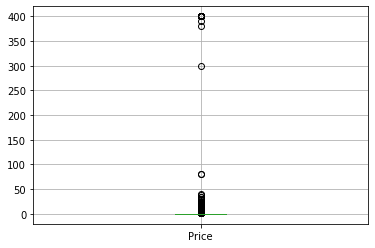

In [24]:
data.boxplot(['Price'])
plt.show()

In [26]:
data[data['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4038,most expensive app (H),FAMILY,4.3,6.0,1500.0,6,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4191,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,718,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4196,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300.0,275,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5046,I am rich,LIFESTYLE,3.8,3547.0,1800.0,3547,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5049,I am Rich Plus,FAMILY,4.0,856.0,8700.0,856,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5050,I am rich VIP,LIFESTYLE,3.8,411.0,2600.0,411,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5051,I Am Rich Premium,FINANCE,4.1,1867.0,4700.0,1867,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5052,I am extremely Rich,LIFESTYLE,2.9,41.0,2900.0,41,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5053,I am Rich!,FINANCE,3.8,93.0,22000.0,93,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5054,I am rich(premium),FINANCE,3.5,472.0,965.0,472,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


As there are many data whose price are more than 200 dollars as this is way too expensive and is being seen as outlier.
so deleting these data's is only option

In [27]:
data.drop(data[data['Price']>200].index, axis=0, inplace=True)

Dropping the values which is more than 200 dollars

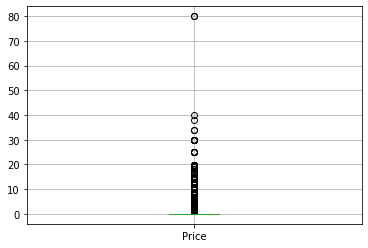

In [28]:
data.boxplot(['Price'])
plt.show()

In [31]:
new_limit=data[data['Price']<30]
new_limit.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,159,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,967,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,87510,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,215644,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,967,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


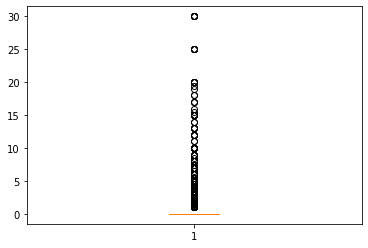

In [32]:
plt.boxplot(new_limit['Price'])
plt.show()

Plotting the data by limiting the data with price which is less than 30 dollars

In [33]:
new_limit2=data[data['Reviews']<1000000]
new_limit2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.000000,159,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.000000,967,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.000000,87510,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.000000,215644,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.000000,967,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9362,FR Calculator,FAMILY,4.0,7.0,2600.000000,7,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9363,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.000000,38,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9364,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.000000,4,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9365,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,21516.529524,114,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


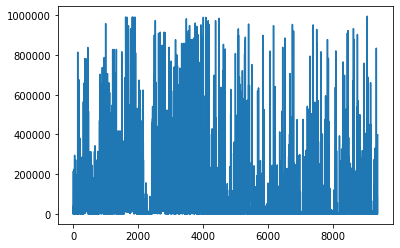

In [34]:
plt.plot(new_limit2['Reviews'])
plt.show()

Plotting the chart by limiting the data to apps with less than 1 million reviews

In [35]:
data['Installs'].quantile(0.95)

1859112.0

In [36]:
data.drop(data[data['Installs']>data['Installs'].quantile(0.95)].index,axis=0,inplace=True)

The 95th quantile of the installs is 1859112 . and the data above this will be considered as outlier. so dropping this outliers 
is the only option.

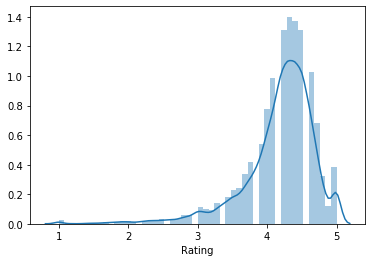

In [37]:
sns.distplot(data['Rating'])
plt.show()

The distribution is negatively skewed distribution.A left-skewed distribution has a long left tail.
Left-skewed distributions are also called negatively-skewed distributions. 
That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

Implication of this on analysis.
As this is negatively skewed distribution , we can say that the long tail in the left side may be sometimes are outliers
and treatment of these outliers are utmost important to make our data useable.

In [38]:
data.drop(data[data['Content Rating']=='Adults only 18+'].index,axis=0,inplace=True)
data.drop(data[data['Content Rating']=='Unrated'].index,axis=0,inplace=True)

In [39]:
data['Content Rating'].value_counts()

Everyone        7113
Teen             988
Mature 17+       435
Everyone 10+     343
Name: Content Rating, dtype: int64

As there was vlues with very few records in the Content Rating column so we dropped that rows .

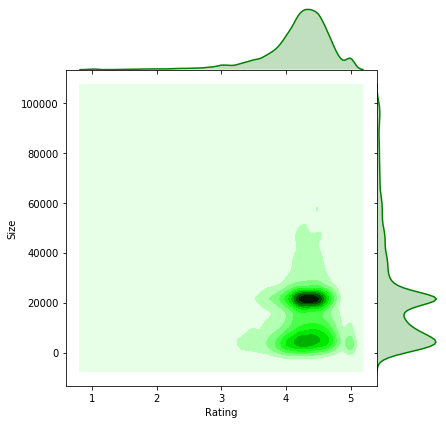

In [41]:
sns.jointplot(x=data['Rating'],y=data['Size'],kind="kde", space=0, color="g")
plt.show()

We can see the pattern here as most of the Ratings are between 4 to 5 and the size is between 10 to 40 mb . 
So the final explaination is that the apps which are having size from 10 to 40 mb are having more chances to get more 
good rating from the users.

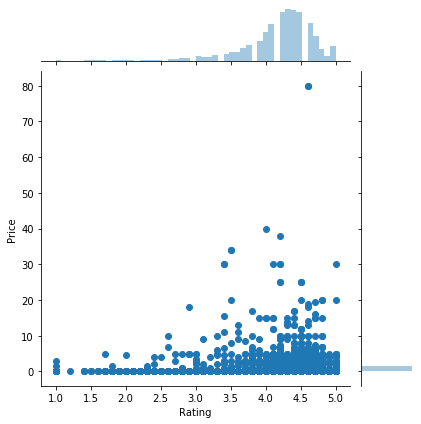

In [42]:
g=sns.jointplot(x='Rating',y='Price',data=data)
plt.show()

We can see that the Rating is high between 3 to 5 and the price is mostly between 0 to 10 dollars.
So we can say that the as the price increases the use base always decreases as more and more apps 
which are being loved by the users are between 0 to 10 dollars .

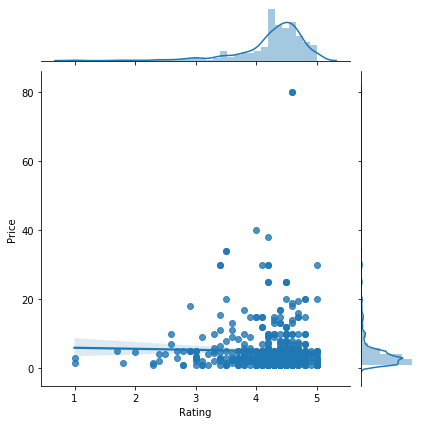

In [43]:
new_replot=data[data['Price']>0]
sns.jointplot(x='Rating',y='Price',data=new_replot,kind='reg')
plt.show()

Replotting the data after limiting the data having price less than 0
The pattern remains the same as the low priced applications are being more chances as well as Ratings.
The effect of Price on the Rating is such as increase in Price will decrease the chances of it being used it 
more by the users and the Rating will also be affected.

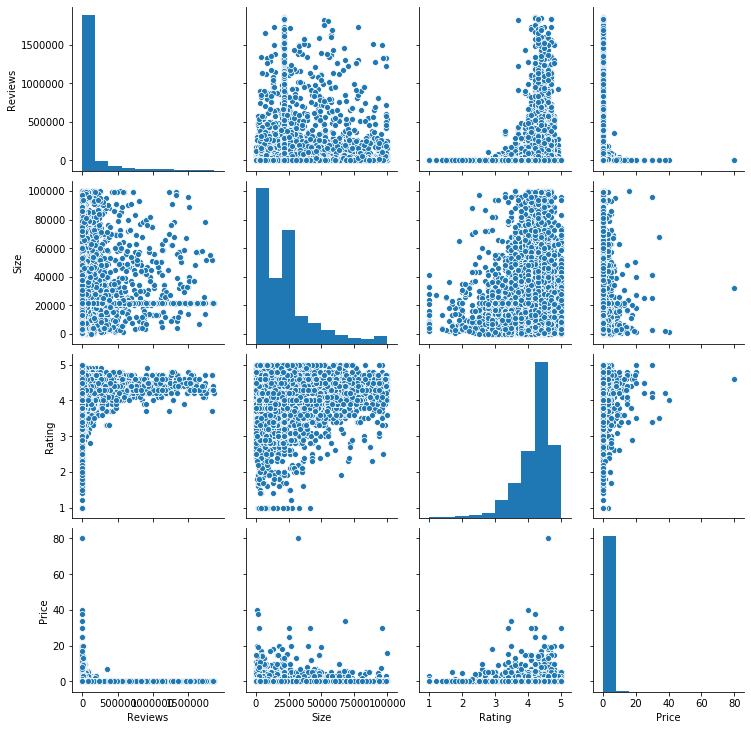

In [44]:
sns.pairplot(data,vars=['Reviews','Size','Rating','Price'])
plt.show()

Pairplot with the columns- Reviews,Size,Rating,Price

In [50]:
data['Content Rating'].value_counts()

Everyone        7113
Teen             988
Mature 17+       435
Everyone 10+     343
Name: Content Rating, dtype: int64

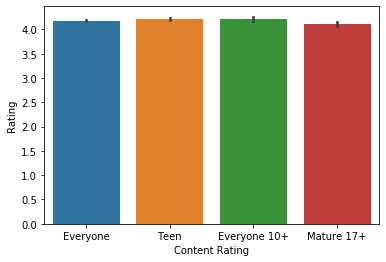

In [51]:
sns.barplot('Content Rating','Rating',data=data)
plt.show()

In [46]:
Cont_new=data.groupby(['Content Rating']).median()
Cont_new['Content Rating'] = Cont_new.index
Cont_new

,Rating,Reviews,Size,Installs,Price,Content Rating
Content Rating,,,,,,
Everyone,4.3,2680.0,16000.000000,2680.0,0.0,Everyone
Everyone 10+,4.3,30693.0,23000.000000,30693.0,0.0,Everyone 10+
Mature 17+,4.2,7779.0,21516.529524,7779.0,0.0,Mature 17+
Teen,4.3,23383.5,21516.529524,23383.5,0.0,Teen


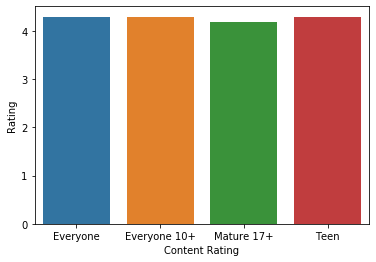

In [48]:
sns.barplot('Content Rating','Rating',data=Cont_new)
plt.show()

Bar plot displaying the rating for each content rating by taking median as metric

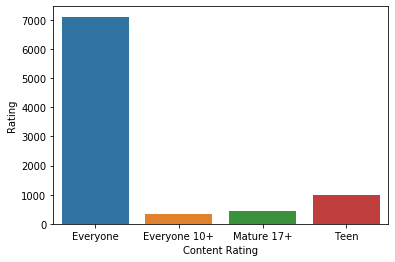

In [49]:
Cont_new1=data.groupby(['Content Rating']).count()
Cont_new1['Content Rating'] = Cont_new1.index
sns.barplot('Content Rating','Rating',data=Cont_new1)
plt.show()

Choosing the count as right metric and plotting

[]

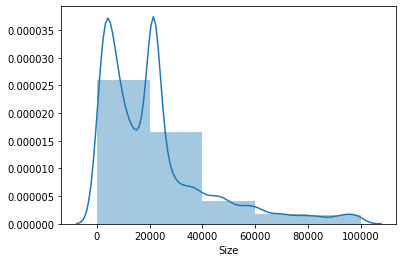

In [52]:
a=sns.distplot(data['Size'],bins=5)
plt.plot()

Creating 5 buckets based on Size i.e 20% records in each.

In [53]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
data['S_Bucket'] = pd.cut(data['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(data, values='Rating', index='S_Bucket', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
S_Bucket,,,,
VERY LOW,4.117206,4.188889,3.951429,4.228421
LOW,4.160232,4.207143,4.129592,4.209655
MED,4.182604,4.300000,3.892647,4.124026
HIGH,4.230186,4.200775,4.176154,4.206985
VERY HIGH,4.191231,4.219355,4.198077,4.263665


In [54]:
data.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     4800.000000
0.4    13000.000000
0.6    21516.529524
0.8    33000.000000
Name: Size, dtype: float64

In [60]:
data.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

In [56]:
S_Bucket =pd.pivot_table(data, values='Rating', index='S_Bucket', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
S_Bucket

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
S_Bucket,,,,
VERY LOW,3.8,3.84,3.28,3.88
LOW,3.8,3.94,3.64,3.88
MED,3.9,4.16,3.50,3.90
HIGH,4.0,4.00,4.00,3.90
VERY HIGH,3.9,4.00,4.00,4.00


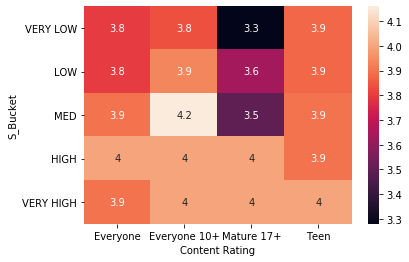

In [58]:
sns.heatmap(S_Bucket, annot = True)
plt.show()

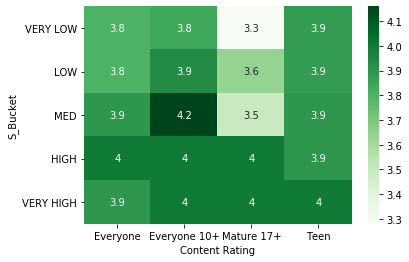

In [61]:
sns.heatmap(S_Bucket, annot=True, cmap='Greens')
plt.show()

In [ ]:
Heavier apps are preferred in all categories.
lighter apps are also preferred,but incase of Mature 17+ this is not the case as heavier apps are more preferred.